In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/stud.csv')


In [ ]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


In [ ]:
x = 0
while x < 5:
  print('number of unique values in ' , df.columns[x],':',df[df.columns[x]].nunique())
  x = x + 1

number of unique values in  gender : 2
number of unique values in  race_ethnicity : 5
number of unique values in  parental_level_of_education : 6
number of unique values in  lunch : 2
number of unique values in  test_preparation_course : 2


In [ ]:
x = 0
while x < 5:
  print('unique values in ' , df.columns[x],':',df[df.columns[x]].unique(),'\n')
  x = x + 1

unique values in  gender : ['female' 'male'] 

unique values in  race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E'] 

unique values in  parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

unique values in  lunch : ['standard' 'free/reduced'] 

unique values in  test_preparation_course : ['none' 'completed'] 



In [ ]:
#numerical and categorical features
numerical =  [features for features in df.columns if df[features].dtype != 'object']
print('the number of numerical features are {} as in:\n'.format(len(numerical)),numerical)

the number of numerical features are 3 as in:
 ['math_score', 'reading_score', 'writing_score']


In [ ]:
categorical = [feature for feature in df.columns if df[feature].dtype == 'object']
print('the number of categorical features in data are {} as in:\n'.format(len(categorical)),categorical)

the number of categorical features in data are 5 as in:
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [ ]:
# adding a total and average folder
df['total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total']/3

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
[print('number of students having full marks in {} are {}'.format(feature,df[df[feature] == 100]['average'].count())) for feature in numerical]

number of students having full marks in math_score are 7
number of students having full marks in reading_score are 17
number of students having full marks in writing_score are 14


[None, None, None]

In [ ]:
[print('number of students having marks less than 20 in {} are {}'.format(feature,df[df[feature] <= 20]['average'].count())) for feature in numerical]

number of students having marks less than 20 in math_score are 4
number of students having marks less than 20 in reading_score are 1
number of students having marks less than 20 in writing_score are 3


[None, None, None]

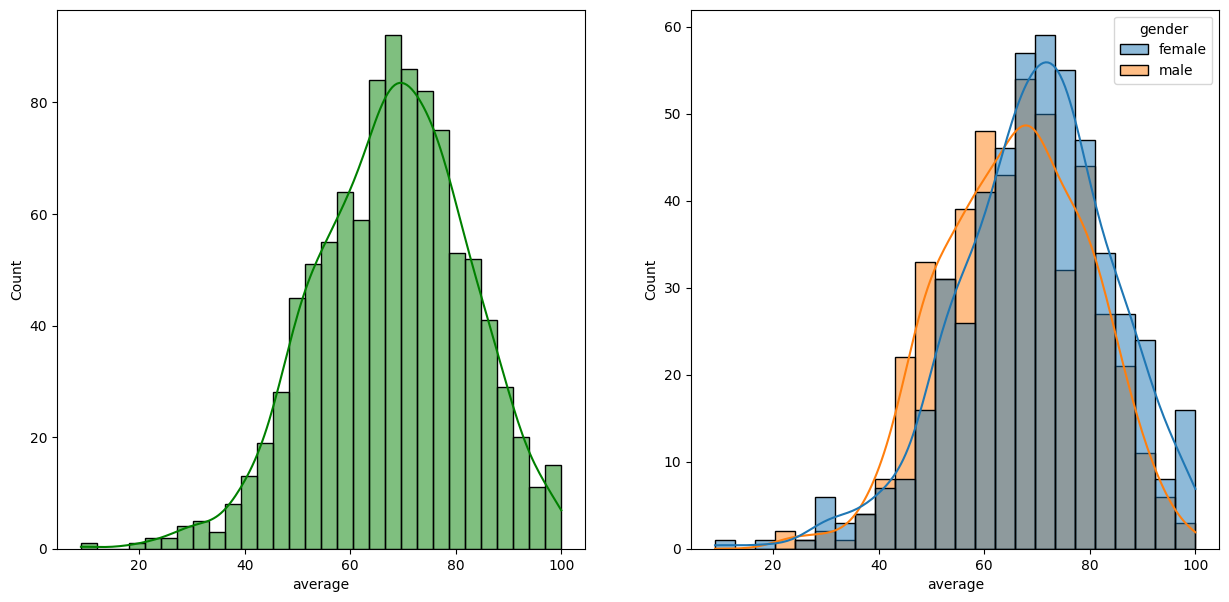

In [ ]:
#visualisation
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x = 'average',bins = 30, kde = True,color = 'g')

plt.subplot(122)
sns.histplot(data = df,x = 'average',kde = True,hue = 'gender')
plt.show()

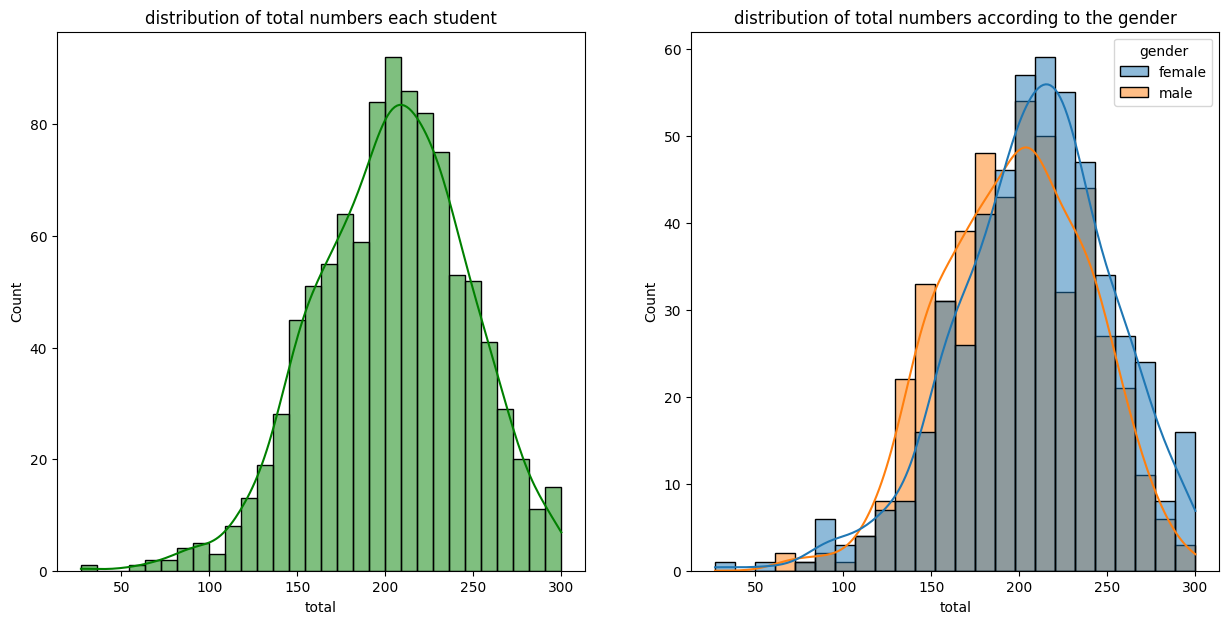

In [ ]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df , x = 'total',bins = 30,kde = True,color = 'g')
plt.title('distribution of total numbers each student')
plt.subplot(122)
sns.histplot(data = df,x = 'total',kde = True,hue = 'gender')
plt.title('distribution of total numbers according to the gender')
plt.show()

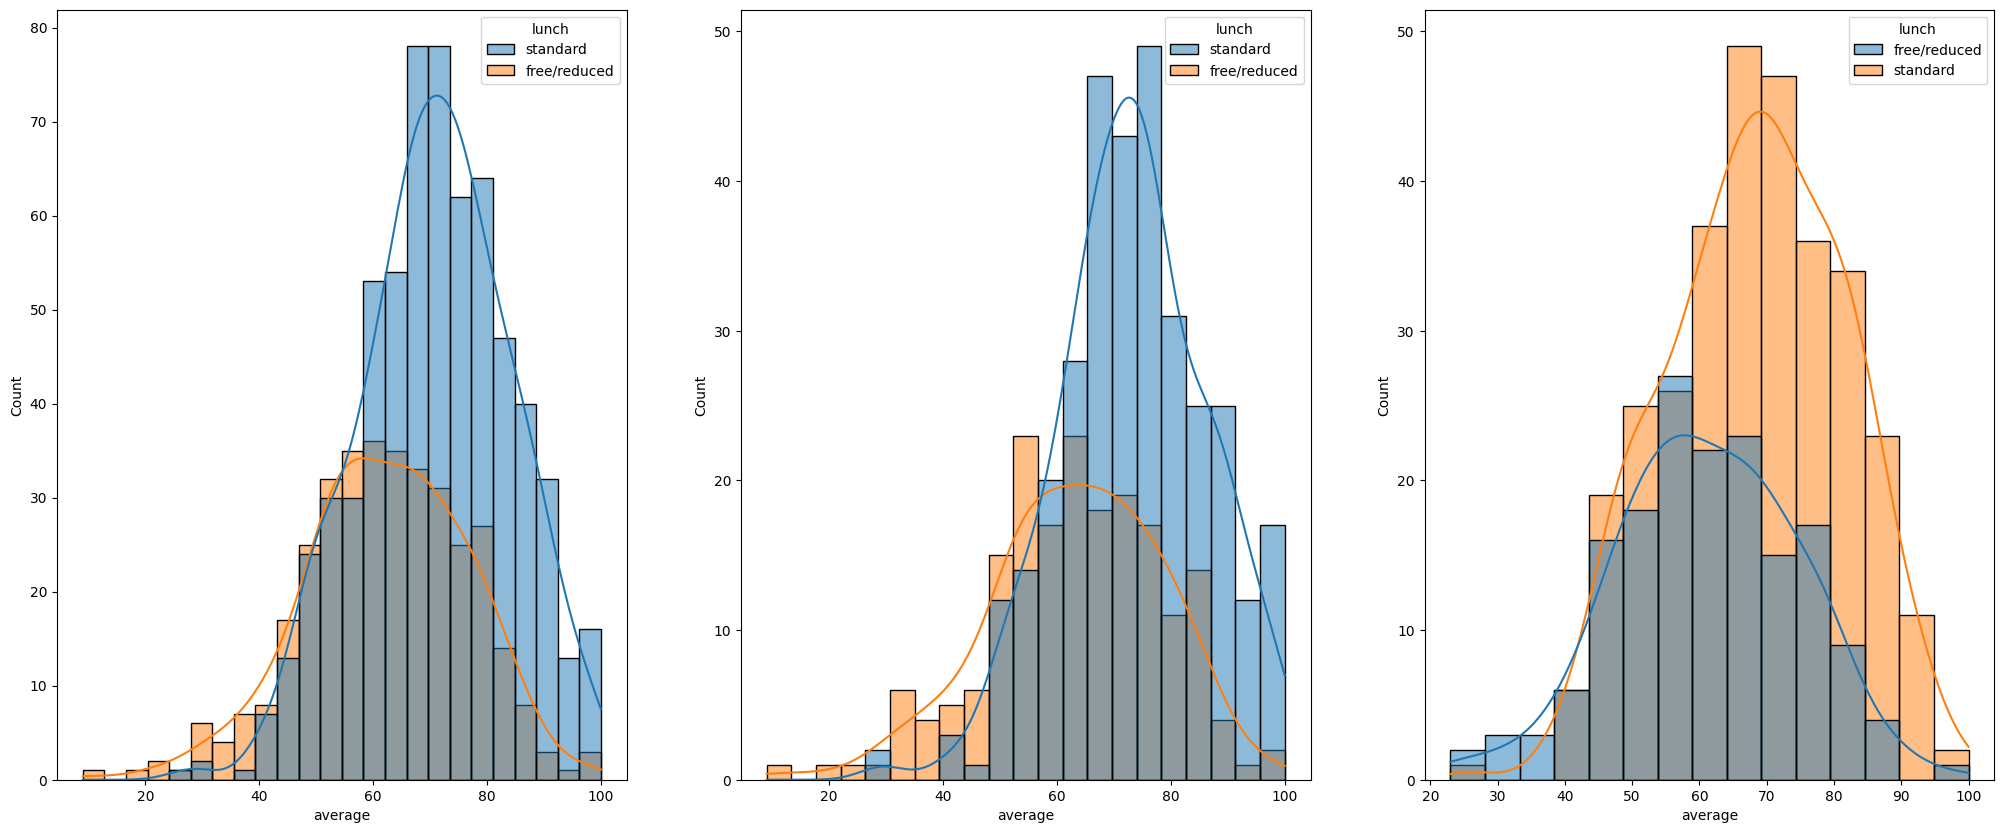

In [ ]:
plt.subplots(1,3,figsize = (25,10))
plt.subplot(131)
sns.histplot(data = df,x = 'average',kde = True,hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'],x = 'average', kde = True,hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x = 'average',kde = True,hue = 'lunch')
plt.show()


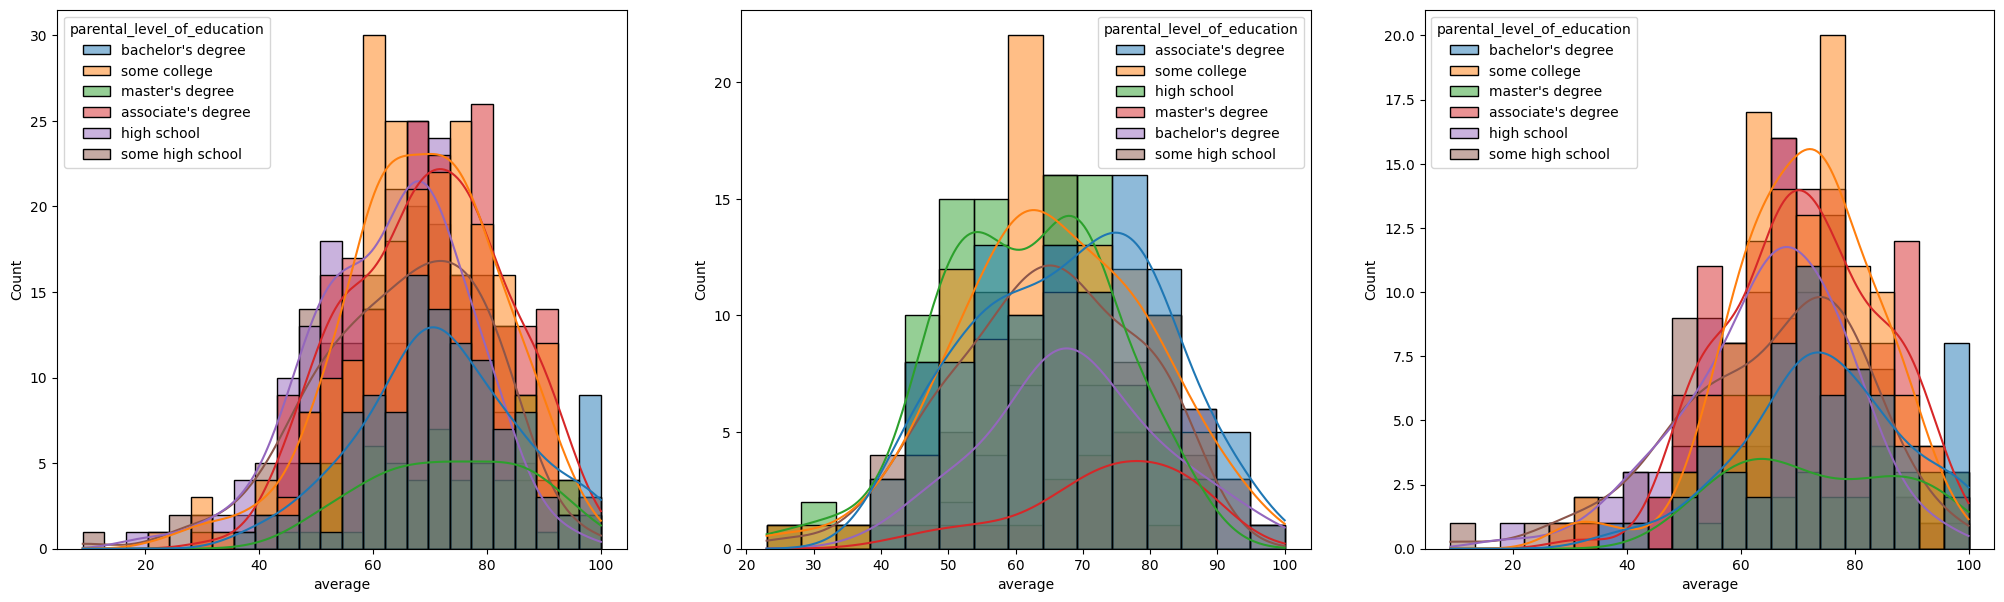

In [ ]:
#parental level of education
plt.subplots(1,3,figsize = (25,7))
plt.subplot(131)
sns.histplot(data = df,x = 'average',kde = True,hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'],x = 'average',kde = True,hue = 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'parental_level_of_education')
plt.show()

Text(0.5, 1.0, 'distribution of students according to their parents education')

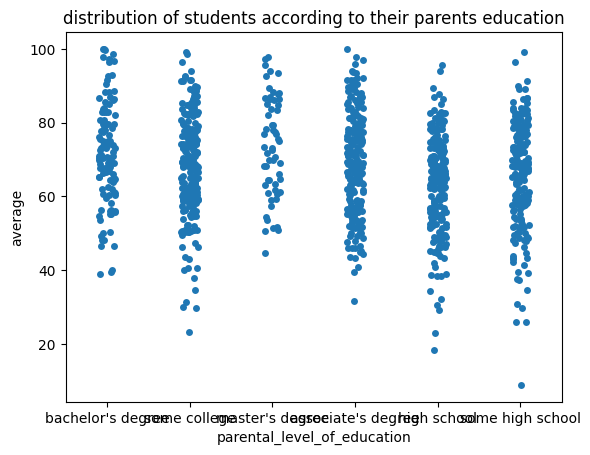

In [ ]:
sns.stripplot(x='parental_level_of_education', y='average', data=df)
plt.title('distribution of students according to their parents education')

Text(0.5, 1.0, 'distribution of male students according to their parents education')

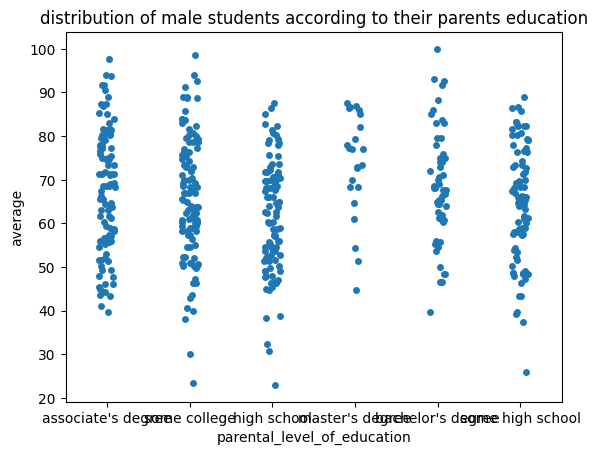

In [ ]:
sns.stripplot(x='parental_level_of_education', y='average', data=df[df.gender == 'male'],)
plt.title('distribution of male students according to their parents education')


Text(0.5, 1.0, 'distribution of female students according to their parents edication')

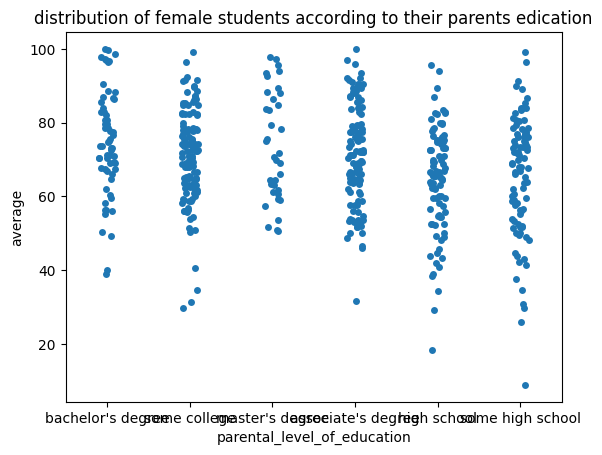

In [ ]:
sns.stripplot(x='parental_level_of_education', y='average', data=df[df.gender == 'female'])
plt.title('distribution of female students according to their parents edication')



In [ ]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total', 'average'],
      dtype='object')

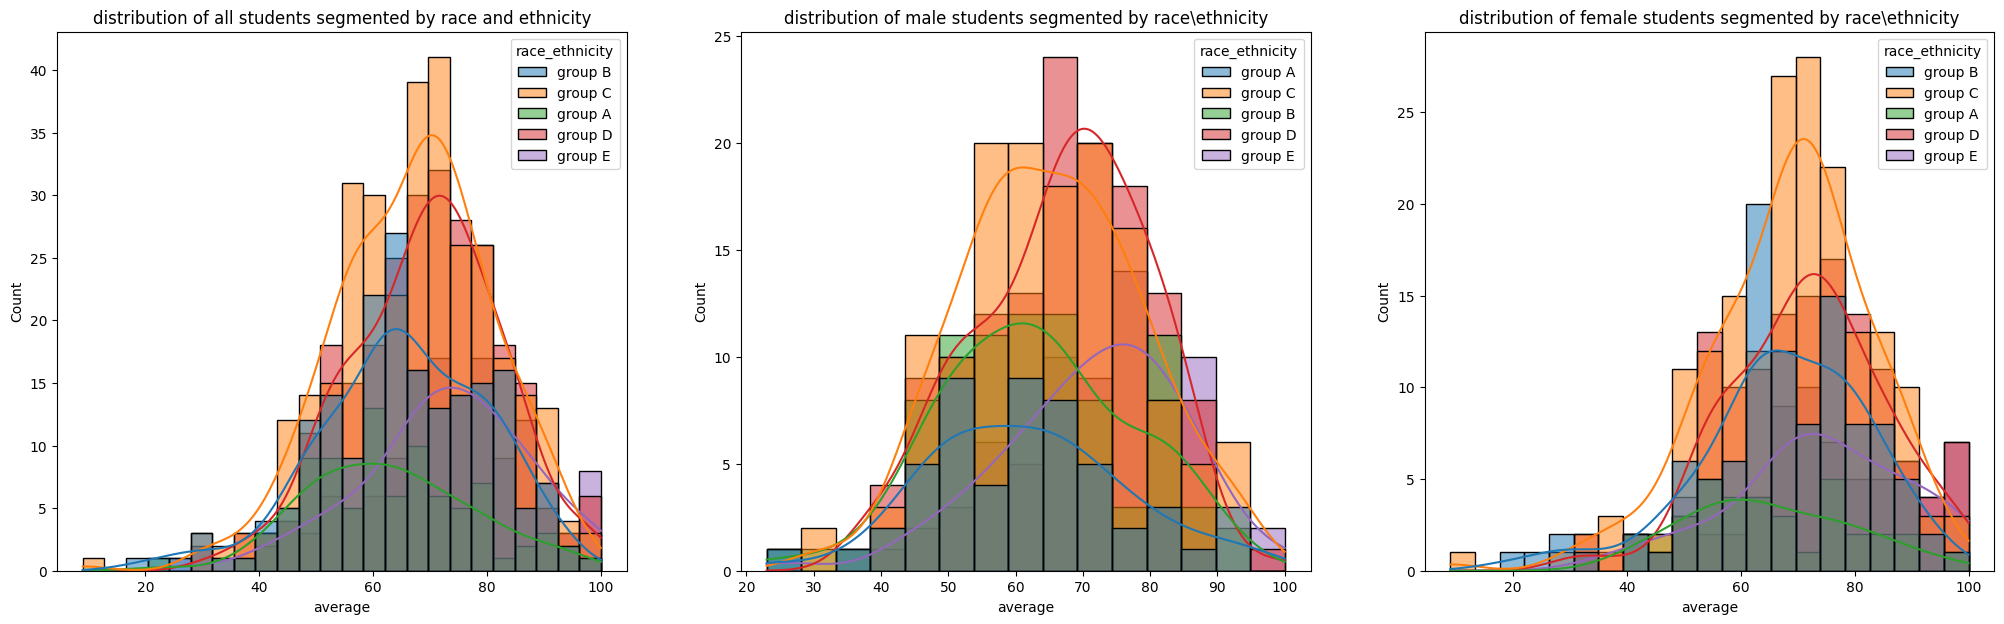

In [ ]:
plt.subplots(1,3,figsize = (25,7))
plt.subplot(131)
sns.histplot(data = df,x = 'average',kde = True,hue = 'race_ethnicity')
plt.title('distribution of all students segmented by race and ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'],kde = True,x = 'average',hue = 'race_ethnicity')
plt.title('distribution of male students segmented by race\ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'],kde = True,x = 'average',hue = 'race_ethnicity')
plt.title('distribution of female students segmented by race\ethnicity')
plt.show()

its all confusing as visible from the above figures


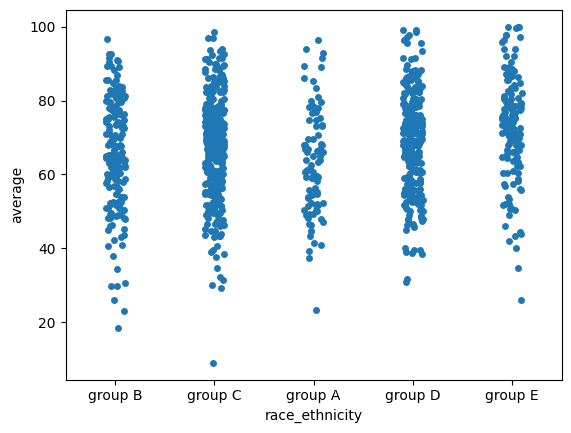

In [ ]:
sns.stripplot(x='race_ethnicity', y='average', data=df)
plt.show()


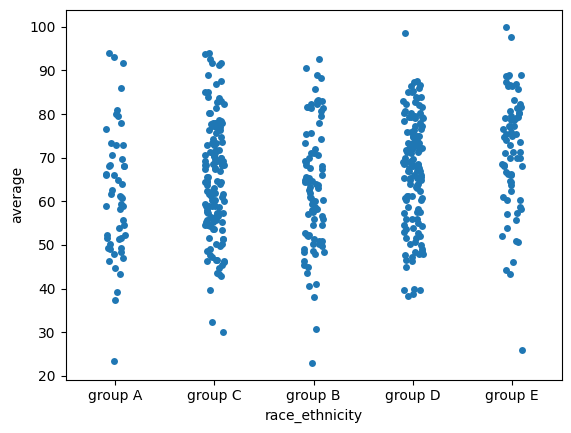

In [ ]:
sns.stripplot(y = 'average', x = 'race_ethnicity', data = df[df.gender == 'male'])
plt.show()

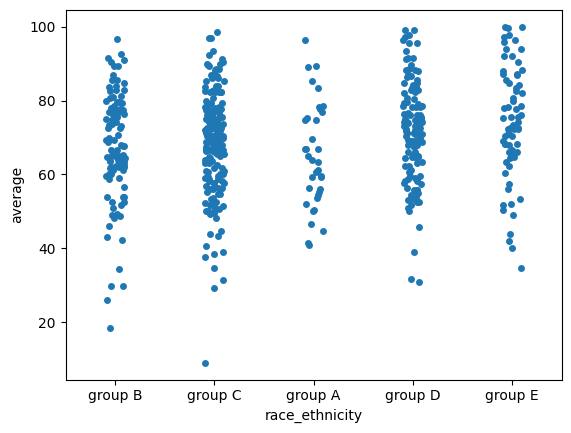

In [ ]:
sns.stripplot(x = 'race_ethnicity',y = 'average',data = df[df.gender == 'female'])
plt.show()

In [ ]:
#univariate and bivariate  analysis of categoriacal features
categorical

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

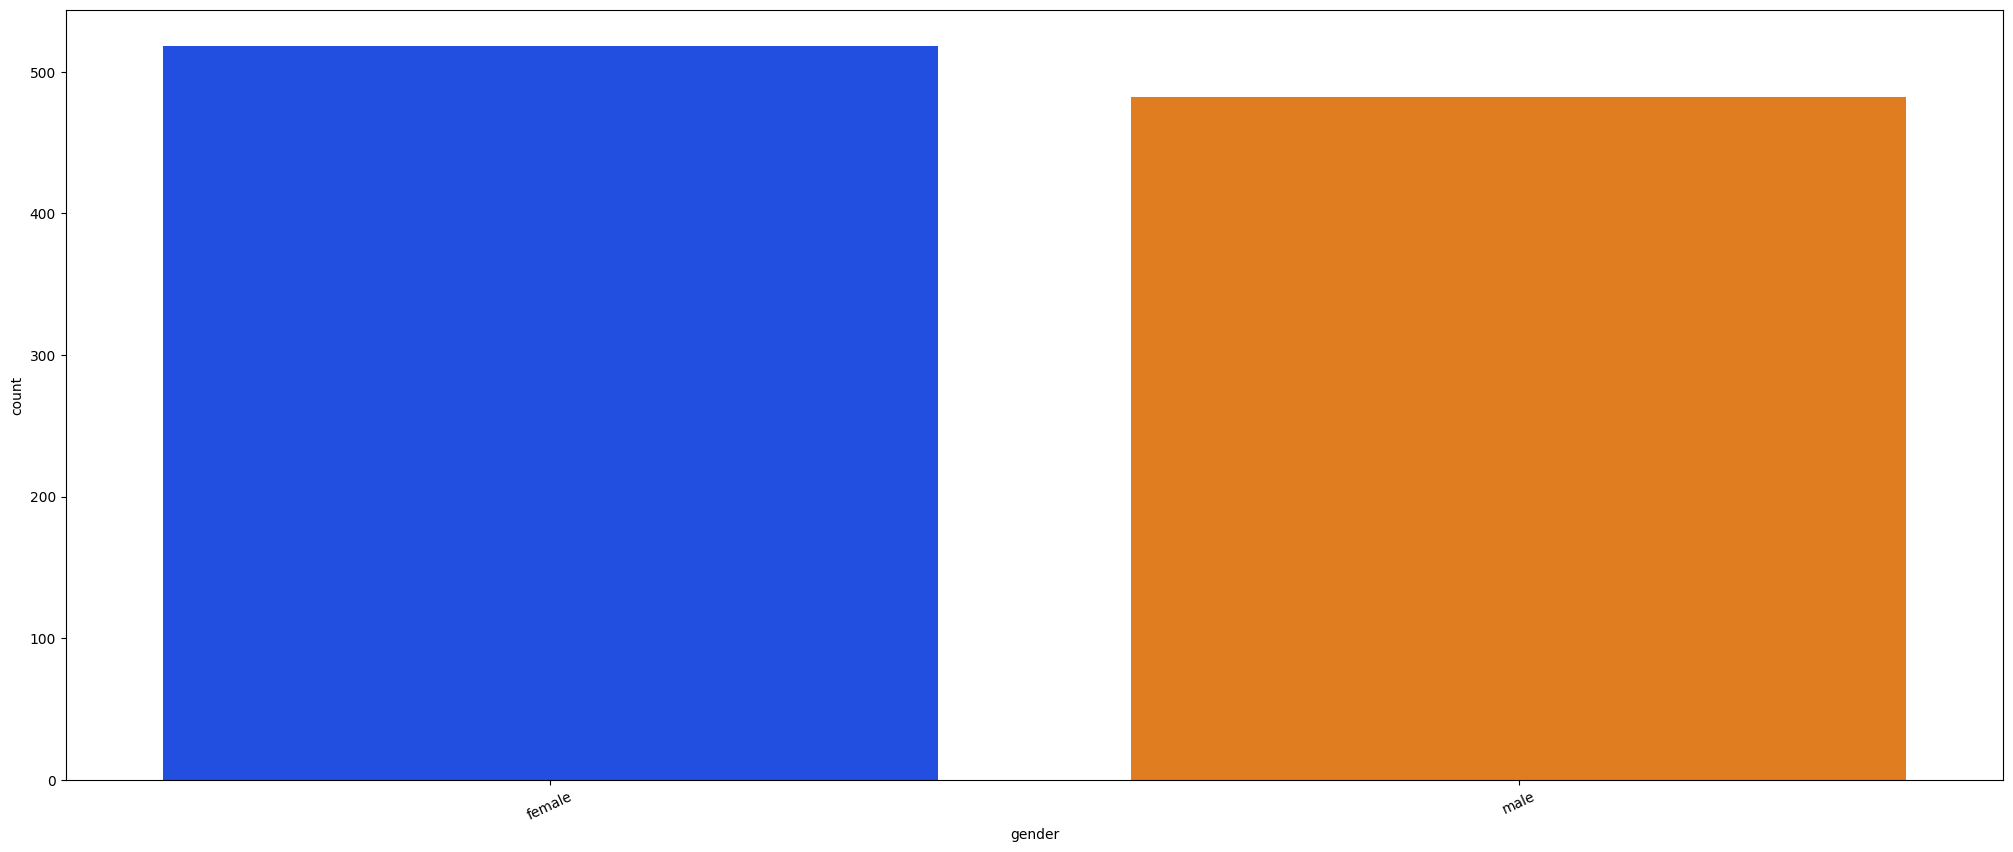

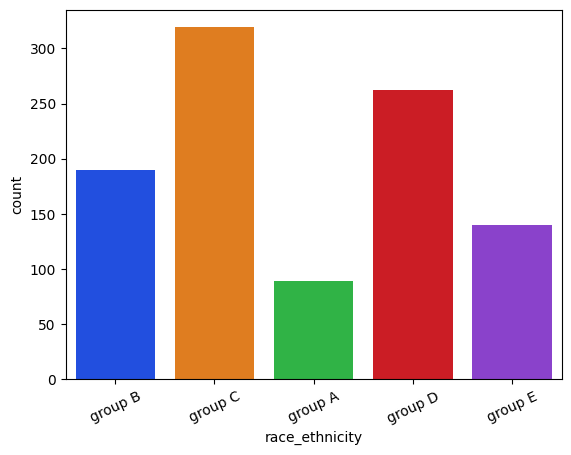

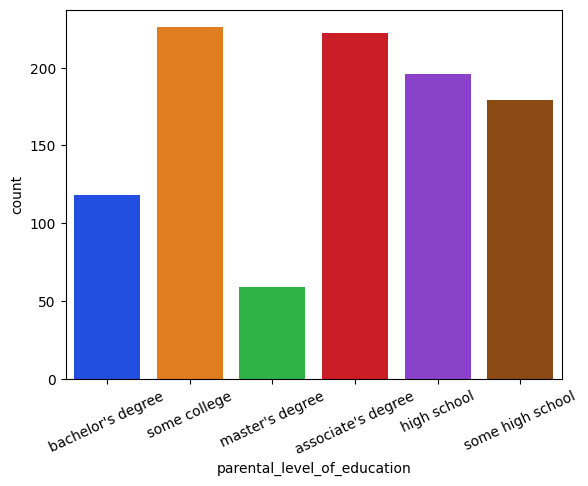

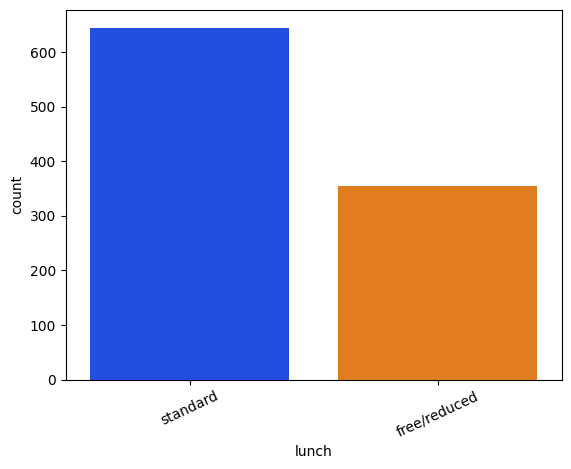

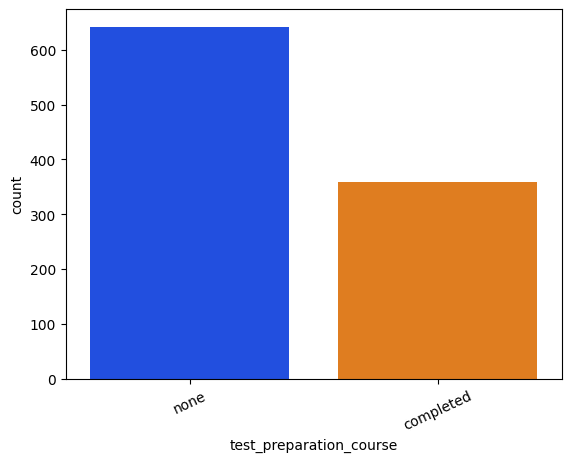

In [ ]:

plt.figure(figsize = (25,10))
for v in categorical:


  sns.countplot(data = df,x = v ,palette = 'bright')
  plt.xticks(rotation = 25)
  plt.show()

In [ ]:
categorical.index('lunch')

3

In [ ]:
from scipy.stats import ttest_ind
standard_scores = df[df['lunch'] == 'standard']['average']
free_reduced_scores = df[df['lunch'] == 'free/reduced']['average']
t_stat, p_value = ttest_ind(standard_scores, free_reduced_scores)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 9.575113051511476, P-value: 7.736791812495384e-21


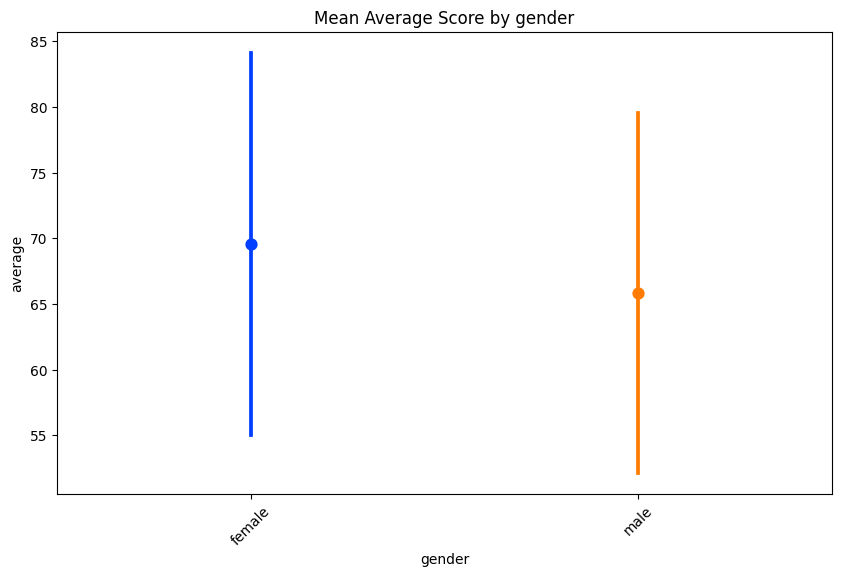

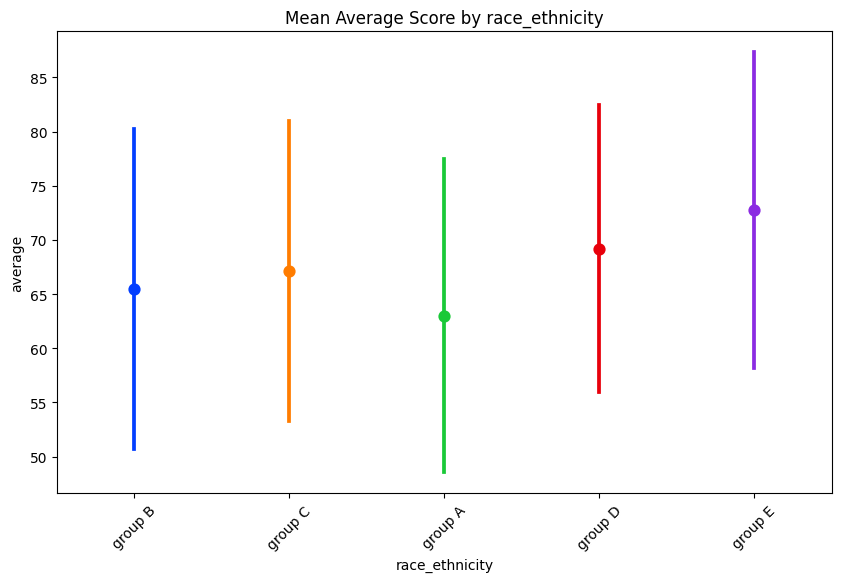

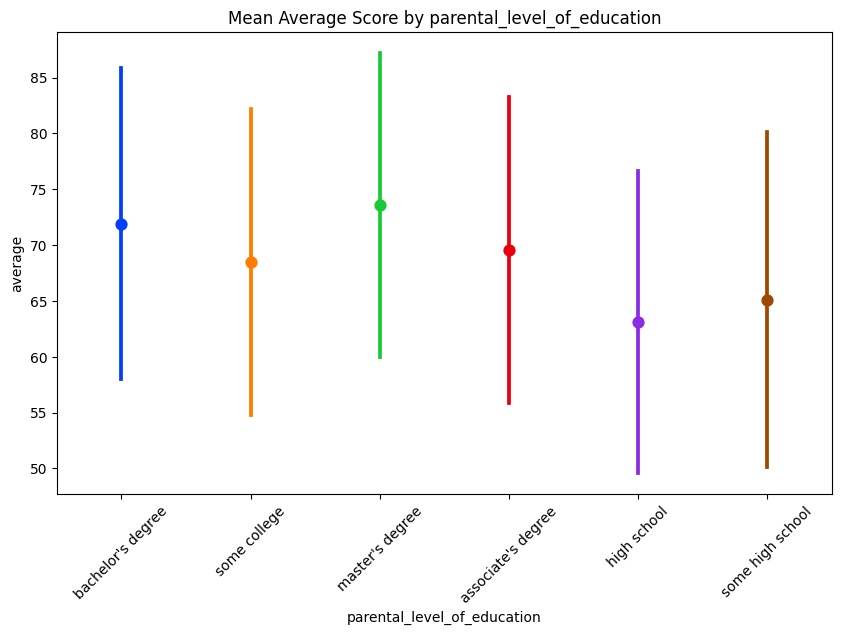

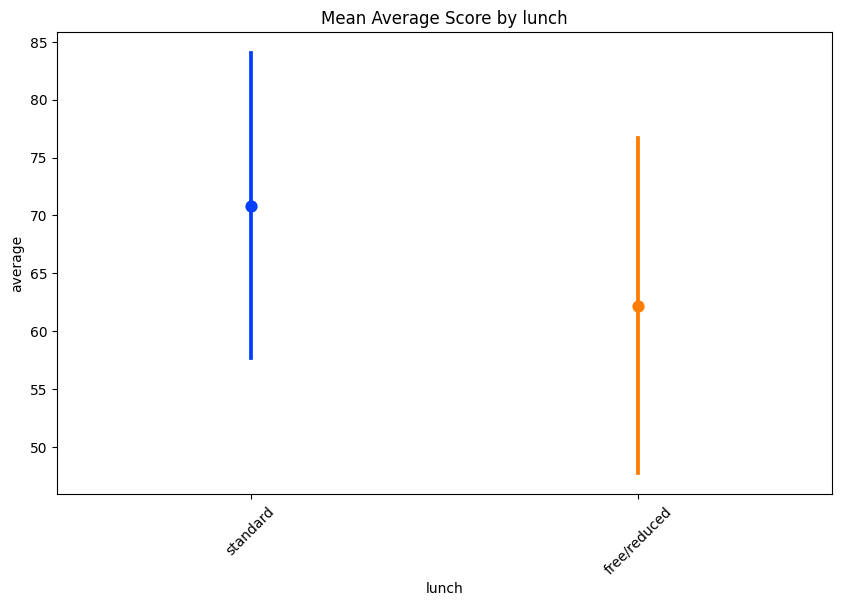

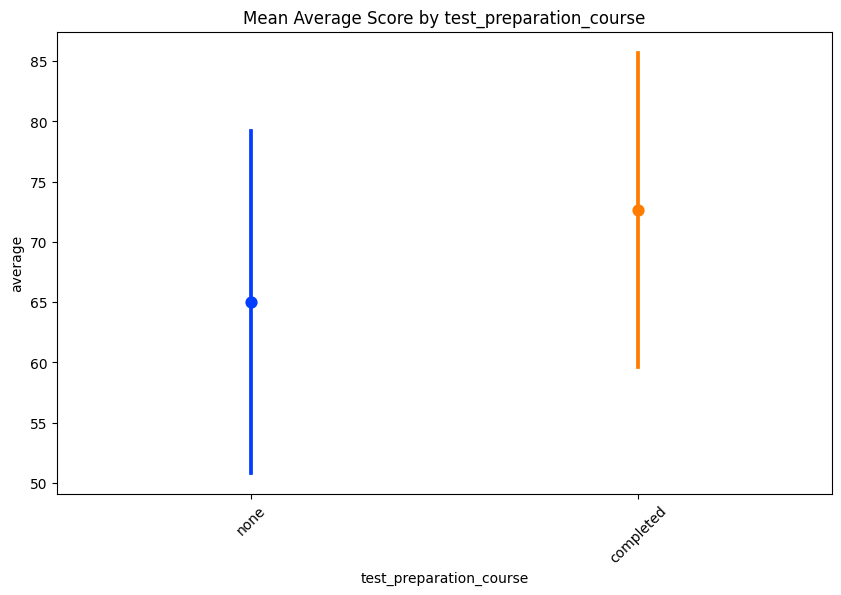

In [ ]:
for feature in categorical:
    plt.figure(figsize=(10, 6))
    sns.pointplot(data=df, x=feature, y='average', ci = 'sd' , palette = 'bright')
    plt.title(f'Mean Average Score by {feature}')
    plt.xticks(rotation=45)
    plt.show()


<Axes: ylabel='average'>

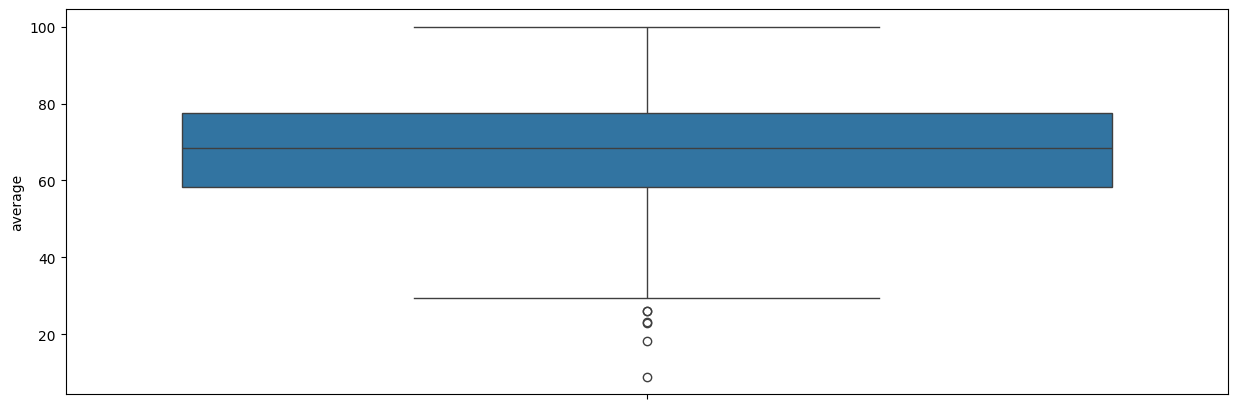

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df,y = 'average')

<Axes: ylabel='total'>

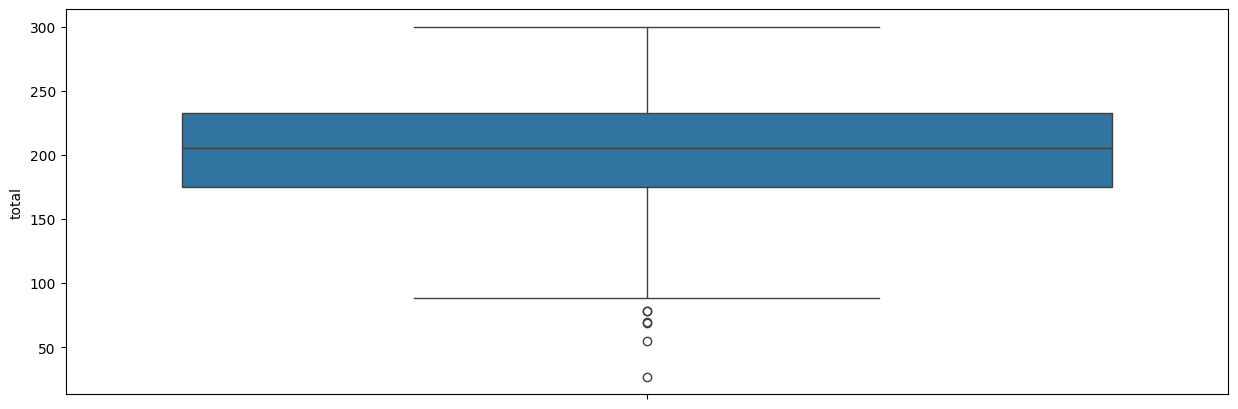

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df,y = 'total')

In [ ]:
df = df.drop(numerical,axis = 1)

In [ ]:
df.to_csv('study2.csv',index = False)